In [1]:
#Importing the Important Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The above dataset is the census income dataset which has 32560 rows and 15 columns where we have to predict on the basis of some factors the income of person i.e whether he is earning more that 50k or less than 50k. This is clearly a classification problem. It has Income as dependent variable. All other factors like Age,Gender,Martial Status fnlwgt are the independent variables. 

In [3]:
df.shape

(32560, 15)

There are total 32560 rows and 15 columns.

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

This tells the name of columns.

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

This tells ud the data types of each rows.

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

This tells us that whether there are any null values in the columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Univariant, Bivariant, Multivariant Analysis.

<AxesSubplot:xlabel='Income', ylabel='count'>

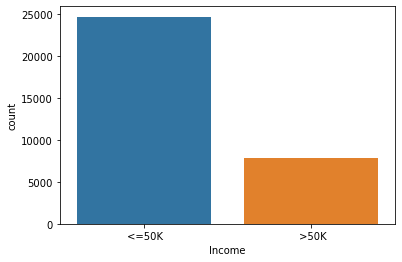

In [8]:
sns.countplot(df['Income'])

We can see that there is huge difference between the two categories of Income featue which is our output feature so we need to balance it we will use balancing technique called SMOTE.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

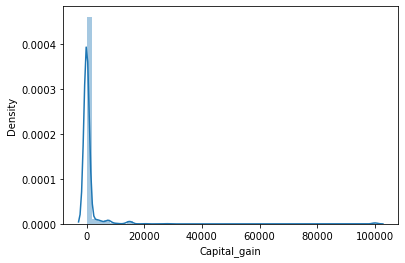

In [9]:
sns.distplot(df['Capital_gain'])

We can see that the skewness is present in our capital gain i.e right tailed.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

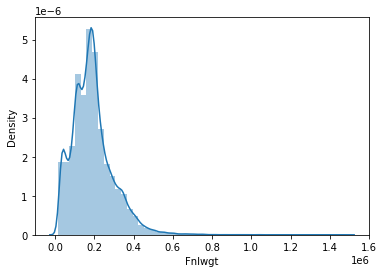

In [11]:
sns.distplot(df['Fnlwgt'])

The data is highly skewed as the column is right tailed.

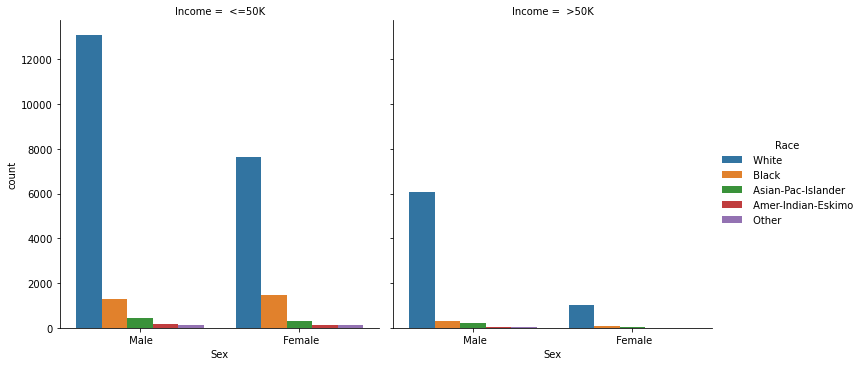

In [13]:
sns.catplot(x="Sex",hue="Race",col="Income",data=df,kind="count")

from above plot we can say that males with white race are dominating in each category.

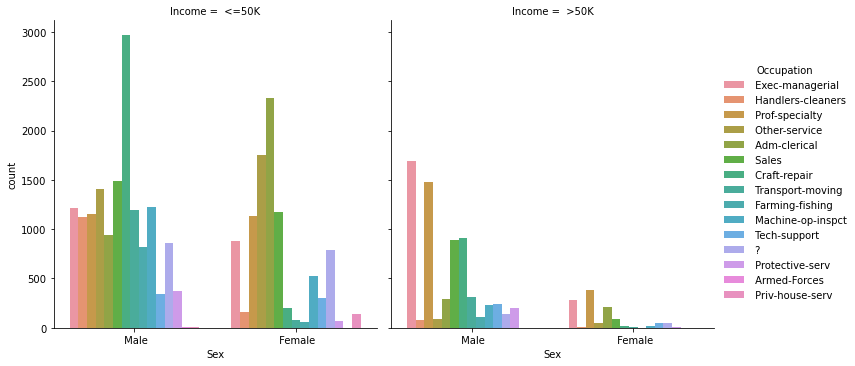

In [15]:
sns.catplot(hue="Occupation",x="Sex",col="Income",data=df,kind="count")

Most of the males are with profession craft-repair and are earning less that 50k where as most females working as adm-clerical earning less that 50k where as males with exec-managerial are earning more that 50k.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

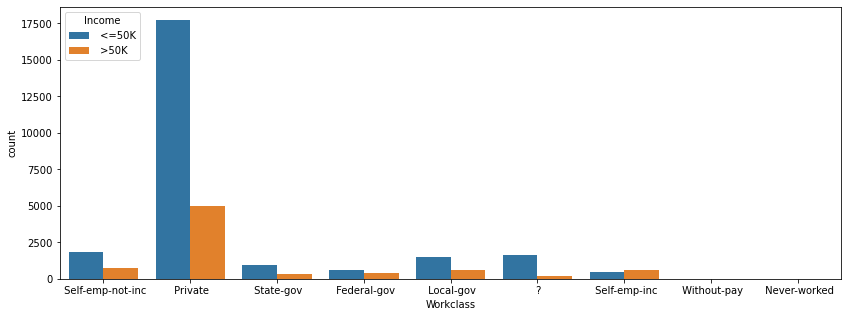

In [23]:
plt.figure(figsize=(14,5))
sns.countplot(x='Workclass',hue='Income',data=df)

Most of the private workclass are earning below 50k.

Age                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Fnlwgt            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Education_num     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Capital_gain      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Capital_loss      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Hours_per_week    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

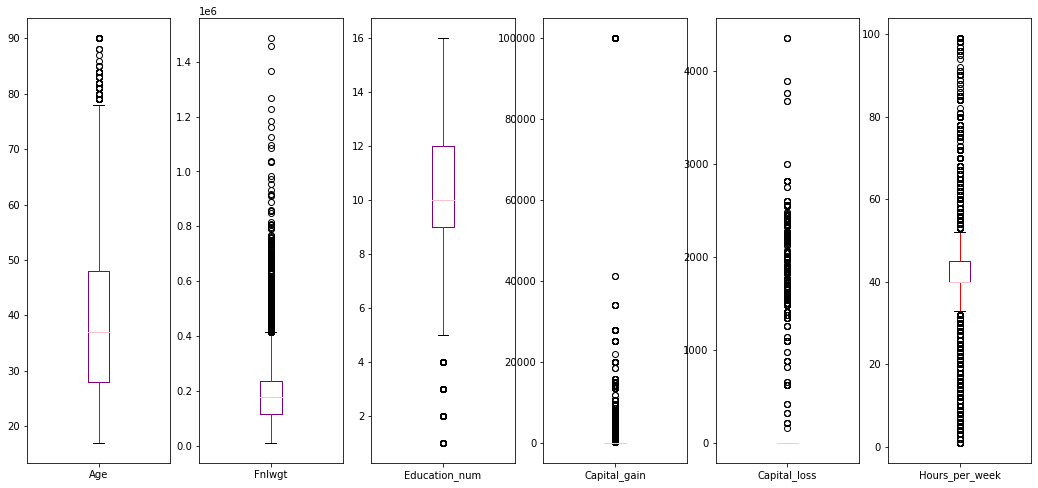

In [25]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(18,18),color=color)

From the above plot we can see the presence of outliers in the dataset which makes the data highly skewed.

# Data Preprocessing/Cleaning

In [27]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

On Calculating the unique count of feature workclass we can see that some of the rows carries question mark. We can not drop the rows carrying question mark as the count for the rows is large we may end up losing imp. info we will replace it with the mode value of the column.

In [28]:
df["Workclass"] = df["Workclass"].str.replace('?', 'Private')

In [29]:
df['Workclass'].value_counts() #no rows carry question mark.

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [30]:
df['Occupation'].value_counts() #calculating the unique value count of each rows.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [31]:
df["Occupation"] = df["Occupation"].str.replace('?', 'Prof-specialty') #replacing ? with mode value

In [32]:
df['Occupation'].value_counts() #no row carry question mark.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [33]:
df['Native_country'].value_counts()#calculating the unique value count of each rows.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [34]:
df["Native_country"] = df["Native_country"].str.replace('?', 'United_States') #replacing ? with mode value

In [35]:
df['Native_country'].value_counts() #no ? in the column now.

 United-States                 29169
 Mexico                          643
 United_States                   583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Feature Engineering

In [36]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

As we could see that in marital status column carries some of the irrelevant categories we can categories them into 3 main categories like married, unmarried, others.

In [37]:
df['Marital_status']=df['Marital_status'].str.replace('Married-civ-spouse','Married')
df['Marital_status']=df['Marital_status'].str.replace('Married-spouse-absent','Married')
df['Marital_status']=df['Marital_status'].str.replace('Married-AF-spouse','Married')
df['Marital_status']=df['Marital_status'].str.replace('Divorced','others')
df['Marital_status']=df['Marital_status'].str.replace('Separated','others')
df['Marital_status']=df['Marital_status'].str.replace('Widowed','others')

In [38]:
df['Marital_status'].value_counts()  #unique count of marital status.

 Married          15417
 Never-married    10682
 others            6461
Name: Marital_status, dtype: int64

# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
name=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [40]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,2,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,0,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,0,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,0,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,0,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,0,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,2,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,1,0,3,4,1,0,0,20,38,0


Converting all the categorial data into integer so as to perfrom the futhur action on the dataset.

<AxesSubplot:>

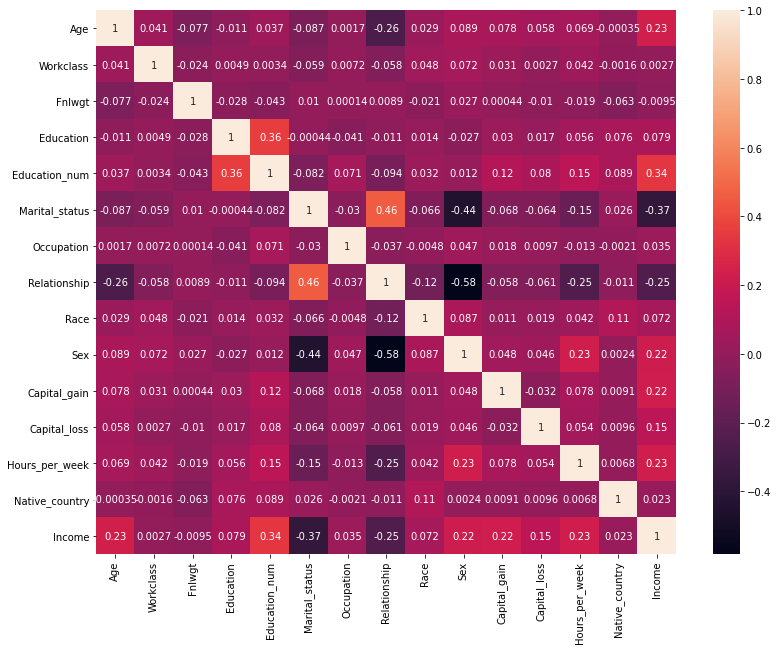

In [44]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

From the above heatmap we can say that,
1. Relationship is positively corelated to marital status definatly the person is married will have different relationship.
2.Education and Education num are positively corelated.
3.Education num is contributing the most in determining the income.

In [45]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,0.724939,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.437561,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,0.772197,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.063631,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,1.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,2.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


From the above.
1. Mean is more than 50% in some of the columns like age, education num, occupation which shows the data is skewed.
2.There is gap between 75% and max we can say the presence of outliers is there.

# Skewness and outliers

In [24]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status     0.516457
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.236041
Income             1.212383
dtype: float64

There is large skewness present in the data we have to remove the skewness or we can say that skewness may be because of outliers present in the dataset we will first remove the outliers then we will go for removing the skewness.

In [25]:
from scipy.stats import zscore
zp=np.abs(zscore(df))   #removing outliers present the dataset
zp
threshold=3
print(np.where(zp>3))
df_new=df[(zp<3).all(axis=1)]
df_new

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,2,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,0,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,0,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,0,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,0,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,0,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,2,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,1,0,3,4,1,0,0,20,38,0


With the help of zscore we have removed the outliers and we are left with 27770 rows.

In [26]:
df_new.skew()

Age                0.484817
Workclass          0.081968
Fnlwgt             0.627985
Education         -0.955755
Education_num     -0.146274
Marital_status     0.478070
Occupation         0.013770
Relationship       0.753668
Race              -2.587044
Sex               -0.688946
Capital_gain       4.930671
Capital_loss      29.514547
Hours_per_week    -0.359841
Native_country    -5.375935
Income             1.322689
dtype: float64

We can see that skewness have been reduced to much extent but still skewness is present we will use power transformation method called yeo-johnson.

# Dividing Dataset into Independent(X) and Dependent(Y) Variable.

In [27]:
x=df_new.iloc[:,:-1]  #Independent variable.
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,0,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,2,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,0,5,0,2,1,0,0,40,38
4,37,3,284582,12,14,0,3,5,4,0,0,0,40,38
5,49,3,160187,6,5,0,7,1,2,0,0,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,0,12,5,4,0,0,0,38,38
32556,40,3,154374,11,9,0,6,0,4,1,0,0,40,38
32557,58,3,151910,11,9,2,0,4,4,0,0,0,40,38
32558,22,3,201490,11,9,1,0,3,4,1,0,0,20,38


In [28]:
y=df_new.iloc[:,-1]  #dependent variable.
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27770, dtype: int32

# VIF FACTOR

In [29]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [30]:
cal_vif(x)

,variables,VIF FACTOR
0,Age,9.814161
1,Workclass,8.785530
2,Fnlwgt,4.717946
3,Education,9.301227
4,Education_num,22.492257
5,Marital_status,2.643589
6,Occupation,3.367545
7,Relationship,3.163351
8,Race,37.058919
9,Sex,4.812647


From above VIF FACTOR calculation we can see that there are no multicolinearites present in our dataset hence we will not drop any of our column.

In [31]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[ 0.92526238,  1.76183874, -1.12664842, ..., -0.04028751,
        -2.21574458,  0.08985809],
       [ 0.12862373, -0.08786913,  0.41301496, ..., -0.04028751,
        -0.03997524,  0.08985809],
       [ 1.10012201, -0.08786913,  0.59335961, ..., -0.04028751,
        -0.03997524,  0.08985809],
       ...,
       [ 1.37466911, -0.08786913, -0.24940583, ..., -0.04028751,
        -0.03997524,  0.08985809],
       [-1.32958378, -0.08786913,  0.27448401, ..., -0.04028751,
        -1.72233518,  0.08985809],
       [ 1.04273713,  0.83027128,  1.06420943, ..., -0.04028751,
        -0.03997524,  0.08985809]])

In [32]:
# to bring all the features on the same scale we will perform standard scaling.
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()
x=mn.fit_transform(x)
x

array([[ 0.92526238,  1.76183874, -1.12664842, ..., -0.04028751,
        -2.21574458,  0.08985809],
       [ 0.12862373, -0.08786913,  0.41301496, ..., -0.04028751,
        -0.03997524,  0.08985809],
       [ 1.10012201, -0.08786913,  0.59335961, ..., -0.04028751,
        -0.03997524,  0.08985809],
       ...,
       [ 1.37466911, -0.08786913, -0.24940583, ..., -0.04028751,
        -0.03997524,  0.08985809],
       [-1.32958378, -0.08786913,  0.27448401, ..., -0.04028751,
        -1.72233518,  0.08985809],
       [ 1.04273713,  0.83027128,  1.06420943, ..., -0.04028751,
        -0.03997524,  0.08985809]])

# SMOTE

In [33]:
y.value_counts()  #huge difference between 2 categories

0    21544
1     6226
Name: Income, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [35]:
y_res.value_counts()  

0    21544
1    21544
Name: Income, dtype: int64

# Performing Algorithms

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [40]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.82 at random state 120


In [42]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=120)

# Logistic Regression

In [43]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.8154250792914056
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6539
           1       0.79      0.85      0.82      6388

    accuracy                           0.82     12927
   macro avg       0.82      0.82      0.82     12927
weighted avg       0.82      0.82      0.82     12927



# Decision Tree Classifier

In [99]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.8479925736829891
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      6459
           1       0.84      0.85      0.85      6468

    accuracy                           0.85     12927
   macro avg       0.85      0.85      0.85     12927
weighted avg       0.85      0.85      0.85     12927



# Ada Boost Classifier

In [51]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 0.854103813723215
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6539
           1       0.83      0.88      0.86      6388

    accuracy                           0.85     12927
   macro avg       0.86      0.85      0.85     12927
weighted avg       0.86      0.85      0.85     12927



# Support Vector Classifier

In [44]:
ker=["rbf","poly","linear"]
for i in ker:
    svc=SVC(kernel=i)
    svc.fit(x_train1,y_train1)
    pred=svc.predict(x_test1)
    print(i,accuracy_score(y_test1,pred))
    print(i,classification_report(y_test1,pred))

rbf 0.8285758489982208
rbf               precision    recall  f1-score   support

           0       0.89      0.75      0.82      6539
           1       0.78      0.90      0.84      6388

    accuracy                           0.83     12927
   macro avg       0.84      0.83      0.83     12927
weighted avg       0.84      0.83      0.83     12927

poly 0.8168175137309507
poly               precision    recall  f1-score   support

           0       0.88      0.74      0.80      6539
           1       0.77      0.90      0.83      6388

    accuracy                           0.82     12927
   macro avg       0.83      0.82      0.82     12927
weighted avg       0.83      0.82      0.82     12927

linear 0.8107836311595885
linear               precision    recall  f1-score   support

           0       0.86      0.74      0.80      6539
           1       0.77      0.88      0.82      6388

    accuracy                           0.81     12927
   macro avg       0.82      0.81      

In [45]:
svc1=SVC(kernel="rbf")
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.8285758489982208
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      6539
           1       0.78      0.90      0.84      6388

    accuracy                           0.83     12927
   macro avg       0.84      0.83      0.83     12927
weighted avg       0.84      0.83      0.83     12927



# Random Forest Classifier

In [46]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 90.19
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6539
           1       0.88      0.92      0.90      6388

    accuracy                           0.90     12927
   macro avg       0.90      0.90      0.90     12927
weighted avg       0.90      0.90      0.90     12927



# Cross Validation Score

In [100]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8019805545552755


In [62]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8516024486856321 2


In [48]:
print(cross_val_score(svc1,x,y,cv=5).mean())

0.8404393230104429


In [49]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.8350018005041413


In [52]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.8575441123514584


On comparing the accuracy score and cross validation score of the various models we can see that the logistic regression, support vector classifier and Ada boost clssifier the cv scores are slightly higher than accuracy score which shows that there could be a chance of over fitting. If we look ate decision Tree classifier and random forest classifier the difference between accuracy score and cross validation scores is same i.e 5 but i will pick random forest as best model as its accuracy is higher than decsion tree classifier.

# ROC_AUC CURVE

In [65]:
y_pred_prob=rf.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.95, 0.33, 0.23, ..., 0.8 , 0.11, 0.83])

In [66]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

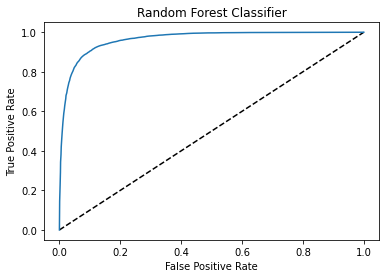

In [67]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random ForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [68]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.9021359296654923

AUC_ROC scores and accurcay score are almost equivalent.

# Hyper Parameter Tuning Using GridSearchCV

In [69]:
parameter={"criterion":['gini','entropy'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [70]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [71]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'oob_score': [True, False]})

In [72]:
gcv.best_params_ 

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'oob_score': False}

# Final Model

In [73]:
final=RandomForestClassifier(criterion="gini",max_depth=19,bootstrap=False,max_features="auto",oob_score=False)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print("Classification Report\n",classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 0.8936334803125242
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      6539
           1       0.86      0.94      0.90      6388

    accuracy                           0.89     12927
   macro avg       0.90      0.89      0.89     12927
weighted avg       0.90      0.89      0.89     12927

[[5570  969]
 [ 406 5982]]


# Saving the Model

In [74]:
import joblib
joblib.dump(final,"census.pkl")

['census.pkl']